## Exploratory Visualizations

In [5]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# new ones!
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [6]:
#Read Data 
ames_train = pd.read_csv('datasets/train.csv')
ames_test = pd.read_csv('datasets/test.csv')

## Exploratory Visualizations

### Listing variables I think qualify as predictors of saleprice based on the corr

In [54]:
ames_train.corr()[['SalePrice']].sort_values(by= 'SalePrice', ascending = False)

/var/folders/gz/cvs186n92z9_zs5h7yb_r5hw0000gn/T/ipykernel_6117/1591803829.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ames_train.corr()[['SalePrice']].sort_values(by= 'SalePrice', ascending = False)


,SalePrice
SalePrice,1.000000
Overall Qual,0.800028
Square Footage,0.779302
Gr Liv Area,0.697032
Garage Area,0.650097
Garage Cars,0.648007
Total Bsmt SF,0.628894
Total_Full_Bath,0.619642
1st Flr SF,0.618345
Year Built,0.571726


/var/folders/gz/cvs186n92z9_zs5h7yb_r5hw0000gn/T/ipykernel_6117/231818864.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ames_train.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False),


<Axes: >

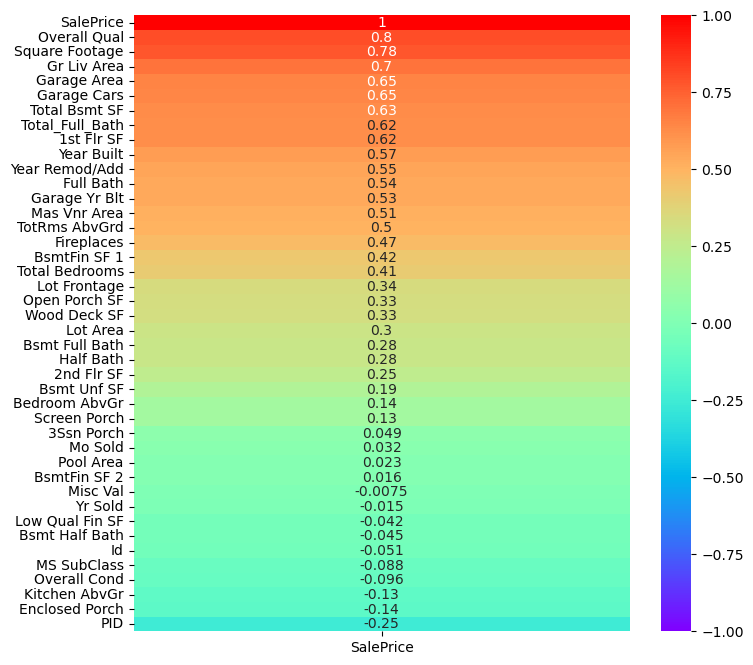

In [55]:
plt.figure(figsize = (8,8))
sns.heatmap(ames_train.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False),
           vmin = -1,
           vmax = 1,
           cmap = 'rainbow',
           annot = True)

In [56]:
ames_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Total_Full_Bath,Square Footage,Total Bedrooms
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,...,0,0,0,3,2010,WD,130500,3.0,2204.0,9
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,0,0,0,4,2009,WD,220000,4.0,3035.0,12
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,0,0,0,1,2010,WD,109000,2.0,2114.0,8
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,4,2010,WD,174000,3.0,1828.0,10
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,0,0,0,3,2010,WD,138500,2.0,2121.0,9


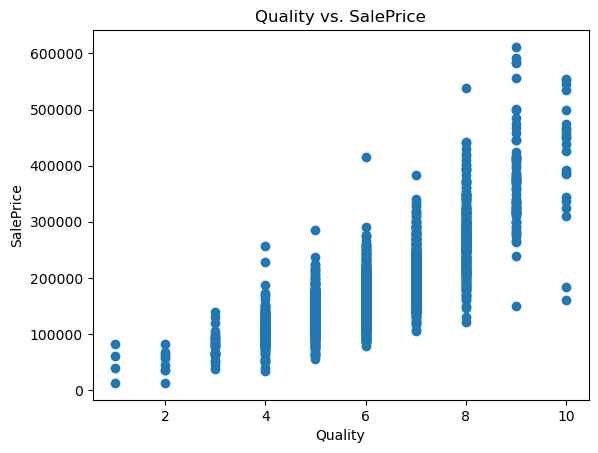

In [57]:
# Scatter plot for Quality vs. SalePrice
plt.scatter(ames_train['Overall Qual'], ames_train['SalePrice'])
plt.xlabel('Quality')
plt.ylabel('SalePrice')
plt.title('Quality vs. SalePrice')
plt.show()

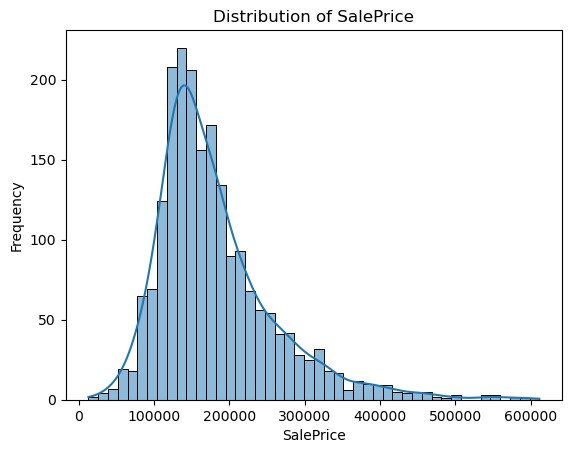

In [58]:
# Visualizing the distribution of the SalePrice
sns.histplot(ames_train["SalePrice"], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

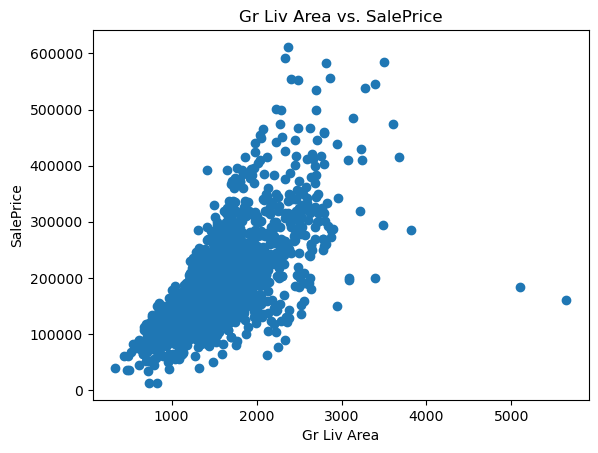

In [59]:
# Scatter plot for Quality vs. SalePrice
plt.scatter(ames_train['Gr Liv Area'], ames_train['SalePrice'])
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.title('Gr Liv Area vs. SalePrice')
plt.show()

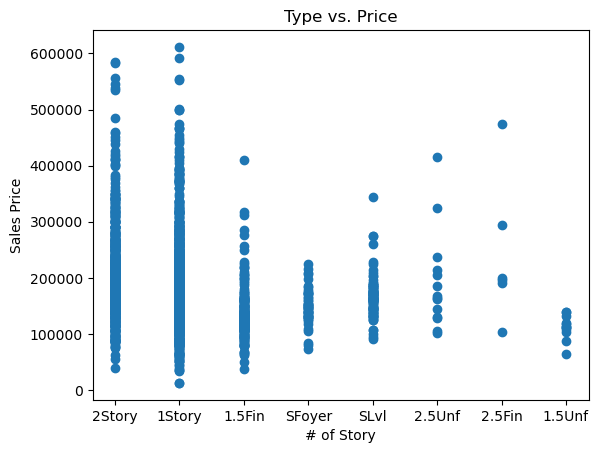

In [60]:
# Scatter plot for Type vs. Price
plt.scatter(ames_train['House Style'], ames_train['SalePrice'])
plt.xlabel('# of Story')
plt.ylabel('Sales Price')
plt.title('Type vs. Price')
plt.show()

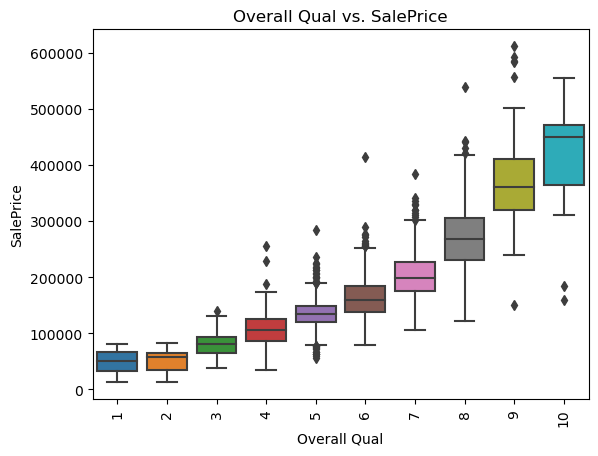

In [61]:
# Box plot of OverallQual
sns.boxplot(data=ames_train, x="Overall Qual", y="SalePrice")
plt.title("Overall Qual vs. SalePrice")
plt.xlabel("Overall Qual")
plt.ylabel("SalePrice")
plt.xticks(rotation=90)
plt.show()

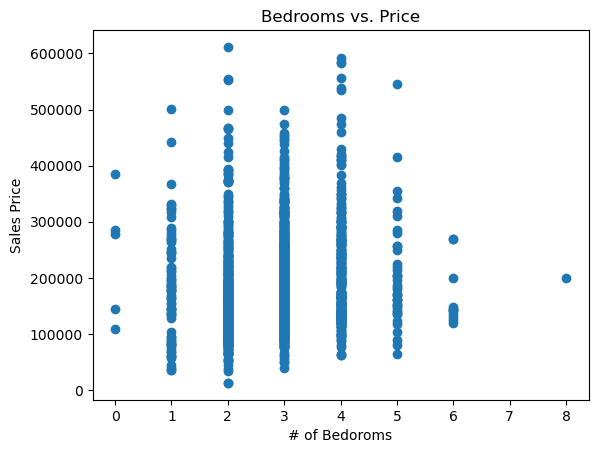

In [62]:
# Scatter plot for Bedroom vs. Price
plt.scatter(ames_train['Bedroom AbvGr'], ames_train['SalePrice'])
plt.xlabel('# of Bedoroms')
plt.ylabel('Sales Price')
plt.title('Bedrooms vs. Price')
plt.show()

## Calculating the possible square footage of the property given the variables available

In [63]:
# Calculate the square footage
ames_train['Square Footage'] = ames_train['1st Flr SF'] + ames_train['2nd Flr SF'] + ames_train['Low Qual Fin SF'] + ames_train['Total Bsmt SF']

# Print the resulting DataFrame with the square footage column
print(ames_train[['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Total Bsmt SF', 'Square Footage']])


      1st Flr SF  2nd Flr SF  Low Qual Fin SF  Total Bsmt SF  Square Footage
0            725         754                0          725.0          2204.0
1            913        1209                0          913.0          3035.0
2           1057           0                0         1057.0          2114.0
3            744         700                0          384.0          1828.0
4            831         614                0          676.0          2121.0
...          ...         ...              ...            ...             ...
2044        1728           0                0         1884.0          3612.0
2045         861           0                0          861.0          1722.0
2046        1172         741                0          896.0          2809.0
2047        1200           0                0         1200.0          2400.0
2048        1028         776                0          994.0          2798.0

[2049 rows x 5 columns]


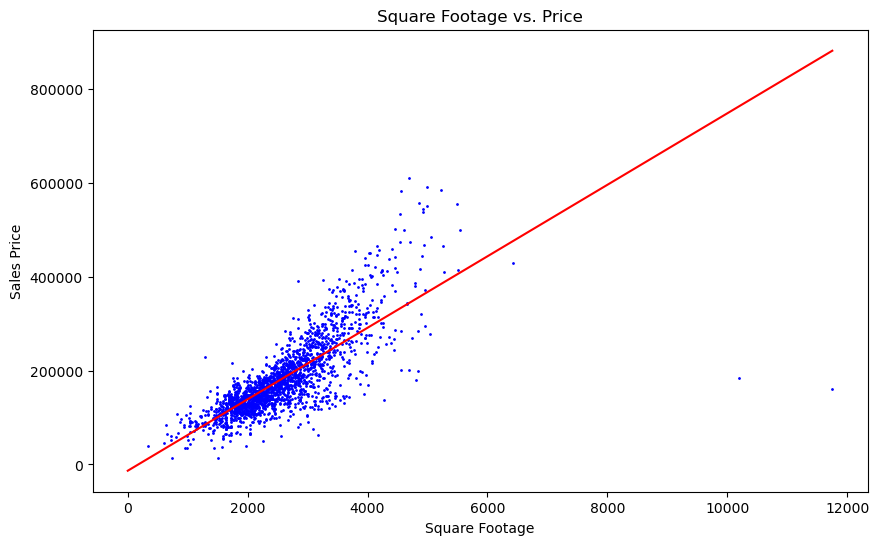

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(ames_train['Square Footage'], ames_train['SalePrice'], s=1, color='blue')
plt.xlabel('Square Footage')
plt.ylabel('Sales Price')
plt.title('Square Footage vs. Price')
slope, intercept = np.polyfit(ames_train['Square Footage'], ames_train['SalePrice'], deg=1)
x = np.linspace(0, ames_train['Square Footage'].max(), 100)
y = slope * x + intercept
plt.plot(x, y, color='red')

plt.show()

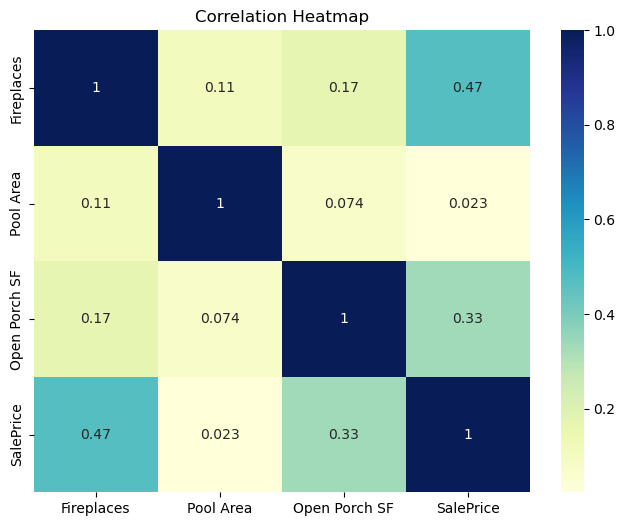

In [65]:
#These show some weak correaltions
some_features = ['Fireplaces', 'Pool Area', 'Open Porch SF']
X = ames_train[some_features]
y = ames_train['SalePrice']

# Calculate the correlation matrix
corr_matrix = X.join(y).corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

plt.title('Correlation Heatmap')
plt.show()

/var/folders/gz/cvs186n92z9_zs5h7yb_r5hw0000gn/T/ipykernel_6117/4043653141.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = X.join(y).corr()


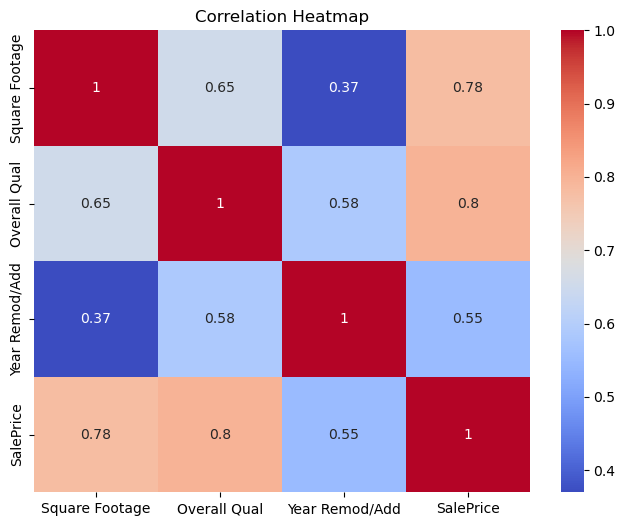

In [66]:
#These show some strong correaltions
some_features = ['Square Footage', 'House Style', 'Overall Qual', 'Year Remod/Add']
X = ames_train[some_features]
y = ames_train['SalePrice']

# Calculate the correlation matrix
corr_matrix = X.join(y).corr()

# Create the heatmap with a different color map (e.g., 'coolwarm')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

In [67]:
ames_train.corr()[['Square Footage']].sort_values(by= 'Square Footage', ascending = False)

/var/folders/gz/cvs186n92z9_zs5h7yb_r5hw0000gn/T/ipykernel_6117/859336643.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ames_train.corr()[['Square Footage']].sort_values(by= 'Square Footage', ascending = False)


,Square Footage
Square Footage,1.000000
Gr Liv Area,0.869311
Total Bsmt SF,0.834964
1st Flr SF,0.796028
SalePrice,0.779302
TotRms AbvGrd,0.665131
Overall Qual,0.654338
Total Bedrooms,0.601646
Garage Area,0.574168
Total_Full_Bath,0.572064


In [68]:
ames_train_encoded = pd.get_dummies(ames_train, columns=['Neighborhood'])

# Display the encoded DataFrame
print(ames_train_encoded.head())

    Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  109  533352170           60        RL           NaN     13517   Pave   
1  544  531379050           60        RL          43.0     11492   Pave   
2  153  535304180           20        RL          68.0      7922   Pave   
3  318  916386060           60        RL          73.0      9802   Pave   
4  255  906425045           50        RL          82.0     14235   Pave   

  Lot Shape Land Contour Utilities  ... Neighborhood_NoRidge  \
0       IR1          Lvl    AllPub  ...                    0   
1       IR1          Lvl    AllPub  ...                    0   
2       Reg          Lvl    AllPub  ...                    0   
3       Reg          Lvl    AllPub  ...                    0   
4       IR1          Lvl    AllPub  ...                    0   

  Neighborhood_NridgHt Neighborhood_OldTown Neighborhood_SWISU  \
0                    0                    0                  0   
1                    0          

## Breaking down per neighborhood in comparison to Mean Sale Price

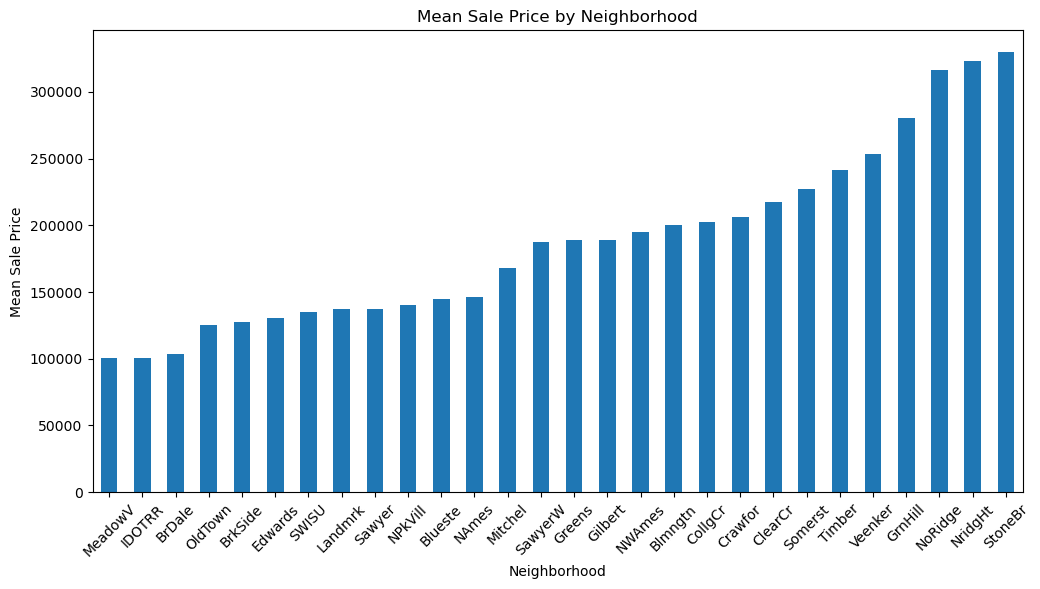

In [69]:
neighborhood_mean_prices = ames_train.groupby('Neighborhood')['SalePrice'].mean().sort_values()

# Create the bar plot
plt.figure(figsize=(12, 6))
neighborhood_mean_prices.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Sale Price')
plt.title('Mean Sale Price by Neighborhood')
plt.xticks(rotation=45)
plt.show()

# Running Multiple Models using various predictors against the target

In [7]:
features = ['Full Bath', 'Wood Deck SF', 'Lot Area']

X= ames_train[features]
y= ames_train['SalePrice']

In [14]:
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                  random_state = 22)

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
print(cross_val_score(lr, X_train, y_train).mean())
lr.score(X_train, y_train), lr.score(X_test, y_test)

#These showed weak scores overall so possible should not be used as predictors of sale price

0.36654485483679417


(0.3791419331000092, 0.4021706308226979)

In [74]:
features_new = ['Square Footage', 'Lot Area', 'Overall Qual']

X= ames_train[features_new]
y= ames_train['SalePrice']

In [75]:
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                  random_state = 22)

In [76]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [77]:
print(cross_val_score(lr, X_train, y_train).mean())
lr.score(X_train, y_train), lr.score(X_test, y_test)

0.7388043357898498


(0.7472919509015685, 0.8093243271256594)

In [78]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Instantiate and fit our model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Train score
print(f'Training R-Squared Score: {lr.score(X_train, y_train)}')
# Test score
print(f'Testing R-Squared Score: {lr.score(X_test, y_test)}')

Training R-Squared Score: 0.7464613734191614
Testing R-Squared Score: 0.8070630548045299


## Lasso and Ridge

In [25]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


features_new = ['Square Footage', 'Lot Area', 'Overall Qual']
target_variable = 'SalePrice'  # Replace this with the actual name of the target variable


X = ames_train[features_new]
y = ames_train[target_variable]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha value as needed
lasso_model.fit(X_train_scaled, y_train)
lasso_score = lasso_model.score(X_test_scaled, y_test)
print("Lasso R-squared score:", lasso_score)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value as needed
ridge_model.fit(X_train_scaled, y_train)
ridge_score = ridge_model.score(X_test_scaled, y_test)
print("Ridge R-squared score:", ridge_score)

Lasso R-squared score: 0.795379406533754
Ridge R-squared score: 0.7953642998005908


Lasso and Ridge regression models have a good R-squared scores, indicating a strong ability to predict the target variable based on the selected features. Also not showing any overfit metricts 

In [80]:
features_1 = ['Full Bath', 'Wood Deck SF', 'Lot Area']
X_1 = ames_train[features_1]
y_1 = ames_train['SalePrice']


features_2 = ['Square Footage', 'Lot Area', 'Overall Qual']
X_2 = ames_train[features_2]
y_2 = ames_train['SalePrice']

model = LinearRegression()

# Cross-validation for features 1
cv_scores_1 = cross_val_score(model, X_1, y_1, cv=5, scoring='neg_mean_squared_error')
rmse_scores_1 = pd.Series(cv_scores_1).apply(lambda x: (-1 * x) ** 0.5)  # Calculate RMSE scores
average_rmse_1 = rmse_scores_1.mean()

# Cross-validation for features 2
cv_scores_2 = cross_val_score(model, X_2, y_2, cv=5, scoring='neg_mean_squared_error')
rmse_scores_2 = pd.Series(cv_scores_2).apply(lambda x: (-1 * x) ** 0.5)  # Calculate RMSE scores
average_rmse_2 = rmse_scores_2.mean()

# average RMSE scores
print("Average RMSE for features 1:", average_rmse_1)
print("Average RMSE for features 2:", average_rmse_2)

Average RMSE for features 1: 63033.08844328248
Average RMSE for features 2: 38855.91243340702


In [81]:
final_features = ['Overall Qual', 'Square Footage', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Garage Area', 'Garage Cars', 'Year Remod/Add']
#Neighboorhood
X= ames_train[final_features]
y= ames_train['SalePrice']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [83]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [84]:
print(cross_val_score(lr, X_train, y_train).mean())
lr.score(X_train, y_train), lr.score(X_test, y_test)

0.7508074239423163


(0.7703211745602822, 0.8253411770168229)

In [85]:
# Combining the bath and the bedroom features to make it easier to call and more features that are have a strong correlation to Sales Price 

In [86]:
ames_train['Total_Full_Bath'] = ames_train['Full Bath'] + ames_train['Bsmt Full Bath'] + ames_train['Half Bath']

In [87]:
ames_train['Total Bedrooms'] = ames_train['Bedroom AbvGr'] + ames_train['TotRms AbvGrd']

In [89]:
ames_train['Total_Full_Bath'] = ames_train['Total_Full_Bath'].fillna(0)

In [101]:
from sklearn.preprocessing import StandardScaler
final_features = ['Overall Qual', 'Square Footage', 'Total_Full_Bath', 'Total Bedrooms', 'Garage Area', 'Garage Cars', 'Year Remod/Add']

X = ames_train[final_features]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X_scaled, columns=final_features)

print(scaled_df)

      Overall Qual  Square Footage  Total_Full_Bath  Total Bedrooms  \
0        -0.079763       -0.436386         0.662796       -0.128239   
1         0.621675        0.589319         1.722132        1.240311   
2        -0.781201       -0.547474        -0.396540       -0.584422   
3        -0.781201       -0.900484         0.662796        0.327944   
4        -0.079763       -0.538833        -0.396540       -0.128239   
...            ...             ...              ...             ...   
2044      1.323113        1.301511         0.662796        0.327944   
2045     -1.482639       -1.031320        -1.455876       -1.952972   
2046     -0.079763        0.310366        -0.396540        1.240311   
2047     -1.482639       -0.194463        -0.396540       -0.128239   
2048      0.621675        0.296789         0.662796        0.327944   

      Garage Area  Garage Cars  Year Remod/Add  
0        0.005715      0.29180        0.989304  
1        0.394798      0.29180        0.608810  


In [88]:
#Saving cleaned file 
ames_train.to_csv('./datasets/train.csv', index = False)